In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import covid_19_shared

'''
Check this:
https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000
'''

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


        

In [13]:
cv_data = covid_19_shared.loadJHUData("US", True)


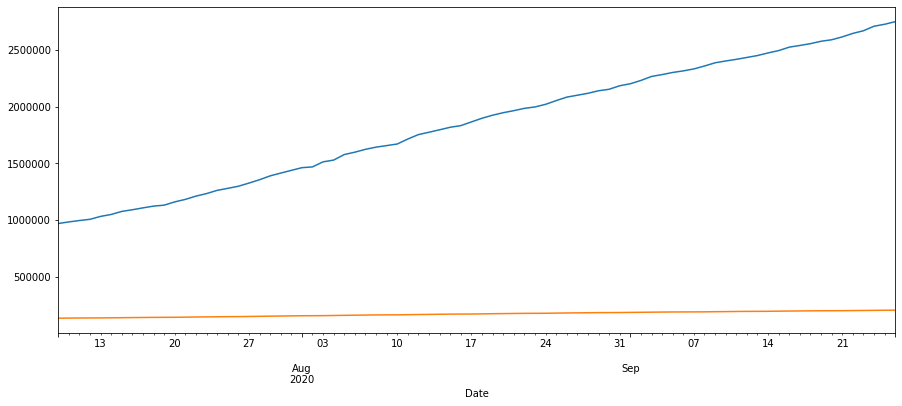

In [14]:
# Recovered Forecast
# recovered_ts = cv_data.Recovered[90:]
# deaths_ts = cv_data.Dead[90:]
take_days = 80

recovered_ts = cv_data.Recovered[-take_days:]
deaths_ts = cv_data.Dead[-take_days:]

recovered_ts.plot()
deaths_ts.plot()

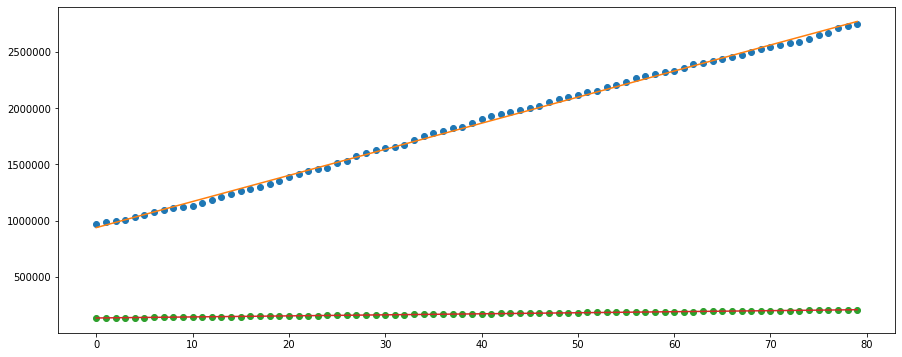

5.432817244677572

In [16]:
def linear_regression(ts : pd.Series):
    x = np.array(range(0, len(ts))) #np.array(df.index.array)
    y = np.array(ts.array)
    plt.plot(x, y, 'o')
    slope, base = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + base)
    return (slope, base)



slope_rec, base_rec = linear_regression(recovered_ts)
slope_dths, base_dths = linear_regression(deaths_ts)
plt.show()
total_number = cv_data.Confirmed[-1]
# base_rec + base_dths + slope_rec *x + slope_dths *x = total_number
x = (total_number - base_rec - base_dths) / (slope_rec + slope_dths)
deaths_rate = (slope_dths * x + base_dths) * 100 / (slope_rec * x + base_rec)
deaths_rate
